# Exploratory Data Analysis (EDA)

In this notebook, we perform exploratory data analysis to understand:

- class distributions
- missing values
- data quality issues

## Imports & Configuration

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path

%matplotlib inline
sns.set(style="whitegrid")


In [2]:
Path.cwd().parents[1]

PosixPath('/Users/napatcholthaipanich/Dev/master/dissertation/workspace/ml')

In [3]:
PATH = os.path.join(Path.cwd().parents[1], "data/interim/rphunter")

## Load Data

In [4]:
total_df = pd.read_csv(os.path.join(PATH, 'total.csv'))
experiment_df = pd.read_csv(os.path.join(PATH, 'experiment.csv'))
combined_df = pd.concat([total_df, experiment_df], ignore_index=True)
combined_df = combined_df.drop_duplicates(ignore_index=True)

## Initial Inspection

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Project Name                   614 non-null    object
 1   Chain                          614 non-null    object
 2   Address                        614 non-null    object
 3   Open Source                    614 non-null    object
 4   Source                         614 non-null    object
 5   Address_lower                  614 non-null    object
 6   in_normal                      614 non-null    object
 7   in_rug                         614 non-null    object
 8   Hidden Balance Modification    616 non-null    int64 
 9   Hidden Mint/Burn               616 non-null    int64 
 10  Address Restrict               616 non-null    int64 
 11  Amount Restrict                616 non-null    int64 
 12  Modifiable External Call       616 non-null    int64 
 13  TimeS

In [6]:
combined_df.head()

,Project Name,Chain,Address,Open Source,Source,Address_lower,in_normal,in_rug,Hidden Balance Modification,Hidden Mint/Burn,Address Restrict,Amount Restrict,Modifiable External Call,TimeStamp Restrict,Hidden Balance Modification.1,Modifiable External Call.1,Modifiable Tax Address,Modifiable Tax Rate
0,GMETA,BSC,0X93023F1D3525E273F291B6F76D2F5027A39BF302,Yes,https://twitter.com/BeosinAlert/status/1681240...,0x93023f1d3525e273f291b6f76d2f5027a39bf302,False,True,0,1,0,0,0,0,0,0,0,1
1,PokémonFi,BSC,0X2753DCE37A7EDB052A77832039BCC9AA49AD8B25,Yes,https://twitter.com/CertiKAlert/status/1562555...,0x2753dce37a7edb052a77832039bcc9aa49ad8b25,False,True,0,0,1,0,0,0,0,0,0,0
2,Sudorare,ETH,0X5404EFAFDD8CC30053069DF2A1B0C4BA881B3E1E,Yes,https://x.com/PeckShieldAlert/status/156196749...,0x5404efafdd8cc30053069df2a1b0c4ba881b3e1e,False,True,0,1,0,0,0,0,0,0,0,0
3,DRAC Network,ETH,0X10F6F2B97F3AB29583D9D38BABF2994DF7220C21,Yes,https://twitter.com/PeckShieldAlert/status/155...,0x10f6f2b97f3ab29583d9d38babf2994df7220c21,False,True,0,1,0,0,0,0,0,0,0,1
4,DHE,BSC,0X11CBC781DADAAD13FC3A361772C80B1C027820AF,Yes,https://twitter.com/CertiKAlert/status/1539031...,0x11cbc781dadaad13fc3a361772c80b1c027820af,False,True,0,0,1,0,0,0,0,0,0,0


In [7]:
combined_df.describe()

,Hidden Balance Modification,Hidden Mint/Burn,Address Restrict,Amount Restrict,Modifiable External Call,TimeStamp Restrict,Hidden Balance Modification.1,Modifiable External Call.1,Modifiable Tax Address,Modifiable Tax Rate
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,0.149351,0.371753,0.301948,0.225649,0.003247,0.030844,0.001623,0.094156,0.064935,0.189935
std,0.356723,0.483666,0.459476,0.418349,0.056934,0.173036,0.040291,0.292283,0.246611,0.392568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
combined_df.columns

Index(['Project Name', 'Chain', 'Address', 'Open Source', 'Source',
       'Address_lower', 'in_normal', 'in_rug', 'Hidden Balance Modification',
       'Hidden Mint/Burn', 'Address Restrict', 'Amount Restrict',
       'Modifiable External Call', 'TimeStamp Restrict',
       'Hidden Balance Modification.1', 'Modifiable External Call.1',
       'Modifiable Tax Address', 'Modifiable Tax Rate'],
      dtype='object')

In [9]:
column_merge_map = {
    "Hidden Balance Modification": ["Hidden Balance Modification", "Hidden Balance Modification.1"],
    "Modifiable External Call": ["Modifiable External Call", "Modifiable External Call.1"],
}

# Merge by summing values across duplicates
for new_col, col_variants in column_merge_map.items():
    combined_df[new_col] = combined_df[col_variants].sum(axis=1)
    combined_df.drop(columns=[col for col in col_variants if col != new_col], inplace=True)

In [10]:
combined_df.columns

Index(['Project Name', 'Chain', 'Address', 'Open Source', 'Source',
       'Address_lower', 'in_normal', 'in_rug', 'Hidden Balance Modification',
       'Hidden Mint/Burn', 'Address Restrict', 'Amount Restrict',
       'Modifiable External Call', 'TimeStamp Restrict',
       'Modifiable Tax Address', 'Modifiable Tax Rate'],
      dtype='object')

## Labels Distribution

In [11]:
target_labels = [   'Hidden Balance Modification', 'Hidden Mint/Burn', 'Address Restrict',
       'Amount Restrict', 'Modifiable External Call', 'TimeStamp Restrict',
       'Modifiable Tax Address', 'Modifiable Tax Rate']
label_counts = combined_df[target_labels].sum()
label_counts

Hidden Balance Modification     93
Hidden Mint/Burn               229
Address Restrict               186
Amount Restrict                139
Modifiable External Call        60
TimeStamp Restrict              19
Modifiable Tax Address          40
Modifiable Tax Rate            117
dtype: int64

#### Bar Plot of Multi-Label Frequency

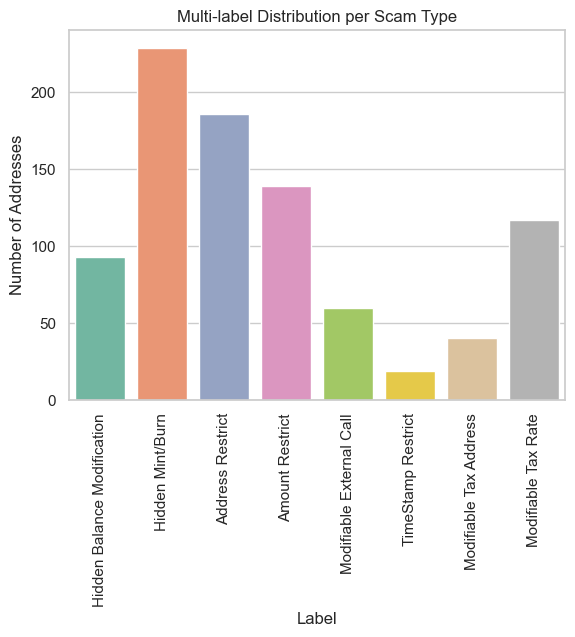

In [12]:
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.title("Multi-label Distribution per Scam Type")
plt.xlabel("Label")
plt.ylabel("Number of Addresses")
plt.xticks(rotation=90)
plt.show()

#### Plot Count of Label Combinations

In [13]:
# Convert one-hot columns to label strings
def get_labels(row):
    return ','.join([
        label for label in target_labels
        if row[label] == 1
    ])

combined_df['label_combo'] = combined_df.apply(get_labels, axis=1)
combined_df['label_combo'] = combined_df['label_combo'].replace('', 'None')  # Replace empty with 'None'
# Count combinations
combo_counts = combined_df['label_combo'].value_counts()
combo_counts

label_combo
Hidden Mint/Burn                                                                                       103
None                                                                                                    53
Address Restrict                                                                                        52
Amount Restrict                                                                                         46
Hidden Balance Modification                                                                             44
Modifiable External Call                                                                                40
Hidden Mint/Burn,Address Restrict                                                                       32
Modifiable Tax Rate                                                                                     23
Hidden Mint/Burn,Amount Restrict                                                                        21
Address Restrict,Modifiab

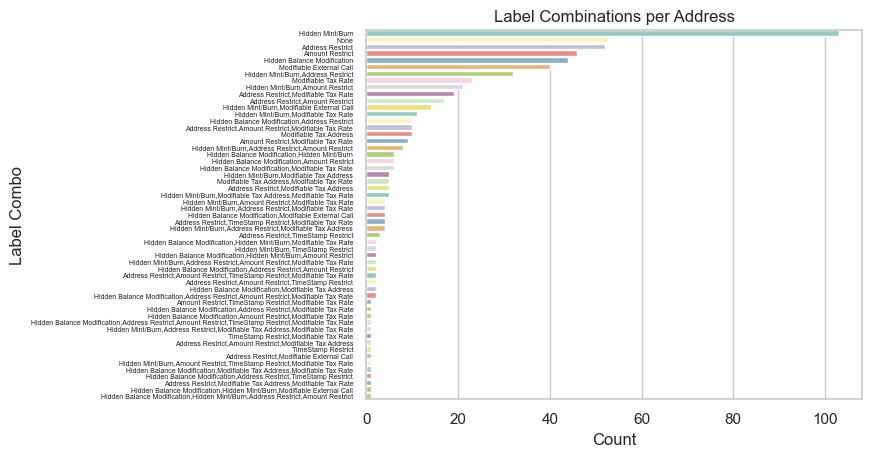

In [14]:
# Plot
sns.barplot(x=combo_counts.values, y=combo_counts.index, palette="Set3")
plt.title("Label Combinations per Address")
plt.xlabel("Count")
plt.ylabel("Label Combo")
plt.yticks(fontsize=5)
plt.show()


## Save Data

In [15]:
combined_df.to_csv(os.path.join(PATH, 'dataset.csv'), index=False)